```{contents}
```

# Workflows

### 1. **Initialization**

* Choose the number of clusters (**K**) beforehand.
* Randomly initialize K centroids (either by randomly selecting K data points or using smarter methods like **K-Means++**).

---

### 2. **Assignment Step (Cluster Assignment)**

* For each data point:

  * Compute the **distance** (usually Euclidean) to each centroid.
  * Assign the point to the cluster with the **nearest centroid**.

👉 After this step, every point belongs to exactly one cluster.

---

### 3. **Update Step (Recompute Centroids)**

* For each cluster:

  * Recalculate the centroid as the **mean of all points assigned to that cluster**.

👉 Centroids move toward the "center of mass" of their assigned points.

---

### 4. **Iteration (Repeat Assignment + Update)**

* Repeat **Step 2 and Step 3** until one of the following conditions is met:

  * **Centroids no longer move significantly** (convergence).
  * **Cluster assignments do not change**.
  * **Maximum number of iterations** is reached.

---

### 5. **Termination (Final Clusters)**

* Once convergence is reached, the final set of clusters is obtained.
* The algorithm outputs:

  * The **cluster assignments** for each data point.
  * The **final centroids**.

---

## Workflow Visualization

```
Initialization → Assignment → Update → Repeat → Convergence
```

Example (with K=3):

1. Randomly pick 3 centroids.
2. Assign points to nearest centroid.
3. Move centroids to mean of assigned points.
4. Repeat steps 2–3 until stable clusters emerge.

---

**In short**

K-Means is an **iterative refinement process**:
**Guess centroids → Assign points → Adjust centroids → Repeat until stable.**



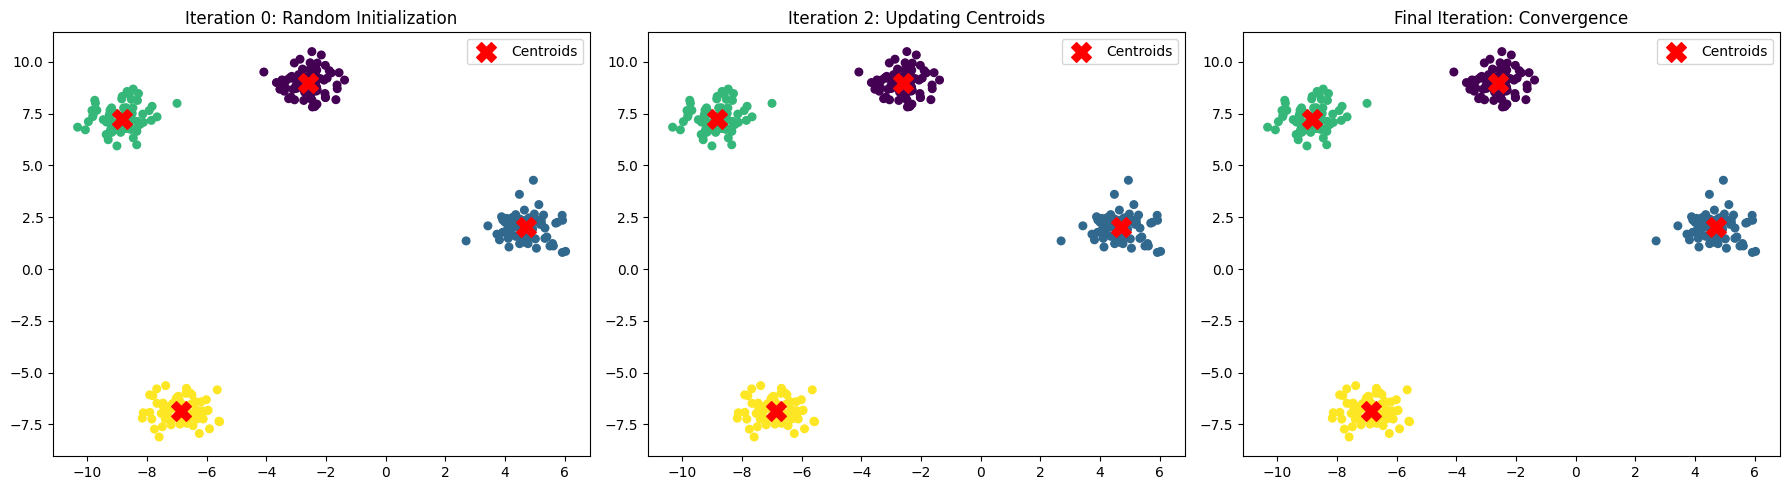

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Store intermediate results manually for visualization
kmeans = KMeans(n_clusters=4, init='random', n_init=1, max_iter=1, random_state=42)
kmeans.fit(X)
centroids_0 = kmeans.cluster_centers_
labels_0 = kmeans.labels_

kmeans = KMeans(n_clusters=4, init=centroids_0, n_init=1, max_iter=2, random_state=42)
kmeans.fit(X)
centroids_1 = kmeans.cluster_centers_
labels_1 = kmeans.labels_

kmeans = KMeans(n_clusters=4, init=centroids_0, n_init=1, max_iter=10, random_state=42)
kmeans.fit(X)
centroids_final = kmeans.cluster_centers_
labels_final = kmeans.labels_

# Plot subplots for workflow visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iteration 0 (random initialization)
axes[0].scatter(X[:, 0], X[:, 1], c=labels_0, cmap='viridis', s=30)
axes[0].scatter(centroids_0[:, 0], centroids_0[:, 1], c='red', marker='X', s=200, label="Centroids")
axes[0].set_title("Iteration 0: Random Initialization")
axes[0].legend()

# Iteration 2 (after assignment + update)
axes[1].scatter(X[:, 0], X[:, 1], c=labels_1, cmap='viridis', s=30)
axes[1].scatter(centroids_1[:, 0], centroids_1[:, 1], c='red', marker='X', s=200, label="Centroids")
axes[1].set_title("Iteration 2: Updating Centroids")
axes[1].legend()

# Final iteration (convergence)
axes[2].scatter(X[:, 0], X[:, 1], c=labels_final, cmap='viridis', s=30)
axes[2].scatter(centroids_final[:, 0], centroids_final[:, 1], c='red', marker='X', s=200, label="Centroids")
axes[2].set_title("Final Iteration: Convergence")
axes[2].legend()

plt.tight_layout()
plt.show()

Here’s a **step-by-step workflow demonstration of K-Means Clustering**:

1. **Random Initialization** → Centroids are placed randomly (Iteration 0).
2. **Assignment Step** → Each point is assigned to the nearest centroid.
3. **Update Step** → New centroids are computed as the mean of the assigned points.
4. **Repeat** → Assignment + Update steps continue until centroids stop moving significantly (convergence).

The plots above show how centroids move and clusters form across iterations — from random initialization → refined clusters → stable convergence.
